### Import the standard Libraries

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing and I/O operations
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [2]:
data = pd.read_csv("train.csv", delimiter=",")
data.head(10)

,# T,V,AP,RH,EP
0,8.58,38.38,1021.03,84.37,482.26
1,21.79,58.20,1017.21,66.74,446.94
2,16.64,48.92,1011.55,78.76,452.56
3,31.38,71.32,1009.17,60.42,433.44
4,9.20,40.03,1017.05,92.46,480.38
5,26.82,69.23,1013.28,50.86,436.36
6,9.48,40.80,1023.82,78.98,485.36
7,9.41,41.54,1019.48,82.19,481.59
8,31.03,69.59,1007.77,63.96,432.56
9,18.24,59.15,1012.00,84.40,449.48


In [3]:
data.tail(5)

,# T,V,AP,RH,EP
7171,9.32,37.73,1022.14,79.49,477.91
7172,11.20,41.38,1021.65,61.89,476.87
7173,29.80,69.34,1009.36,64.74,437.65
7174,16.37,54.30,1017.94,63.63,459.97
7175,30.11,62.04,1010.69,47.96,444.42


In [4]:
data.shape

(7176, 5)

In [5]:
y_train = data[' EP']

In [6]:
del data[' EP']

In [7]:
data.head(5)

,# T,V,AP,RH
0,8.58,38.38,1021.03,84.37
1,21.79,58.20,1017.21,66.74
2,16.64,48.92,1011.55,78.76
3,31.38,71.32,1009.17,60.42
4,9.20,40.03,1017.05,92.46


In [8]:
y_train.head(5)

0    482.26
1    446.94
2    452.56
3    433.44
4    480.38
Name:  EP, dtype: float64

## Structure of the Dataset

In [9]:
data.describe()

,# T,V,AP,RH
count,7176.000000,7176.000000,7176.000000,7176.000000
mean,19.629712,54.288154,1013.263032,73.275818
std,7.475256,12.751468,5.964863,14.625093
min,1.810000,25.360000,992.890000,25.560000
25%,13.470000,41.740000,1009.010000,63.202500
50%,20.315000,52.050000,1012.910000,74.895000
75%,25.720000,66.540000,1017.302500,84.925000
max,35.770000,81.560000,1033.300000,100.160000


In [10]:
y_train.shape

(7176,)

### Check for missing values in my dataset

In [11]:
data.isnull().sum()

# T    0
 V     0
 AP    0
 RH    0
dtype: int64

In [12]:
data.isna().sum()

# T    0
 V     0
 AP    0
 RH    0
dtype: int64

### Exploratory Data Analysis

In [13]:
# Statistics
min_EP= np.min(y_train) #min EP (Alternative we could use pandas as min_EP = y_train.min())
max_EP = np.max(y_train)
mean_EP = np.mean(y_train)
median_EP = np.median(y_train) 
std_EP = np.std(y_train) 

#Quartile Calculations
first_quartile = np.percentile(y_train, 25)
third_quartile = np.percentile(y_train, 75)
inter_quartile = third_quartile - first_quartile

# Show the calculated statistics
print("Statistics for Combined Cycle Power Plant dataset:\n")
print("Minimum EP: ",min_EP)
print("Maximum EP: ",max_EP)
print("Mean EP: ",mean_EP)
print("Median EP: ",median_EP)
print("Standard deviation of EP: ",std_EP)
print("First quartile of EP: ",first_quartile)
print("Second quartile of EP: ",third_quartile)
print("Interquartile (IQR) of EP: ",inter_quartile)

Statistics for Combined Cycle Power Plant dataset:

Minimum EP:  420.26
Maximum EP:  495.76
Mean EP:  454.43129319955347
Median EP:  451.74
Standard deviation of EP:  17.13337725345268
First quartile of EP:  439.7375
Second quartile of EP:  468.6675
Interquartile (IQR) of EP:  28.930000000000007


### Plotting

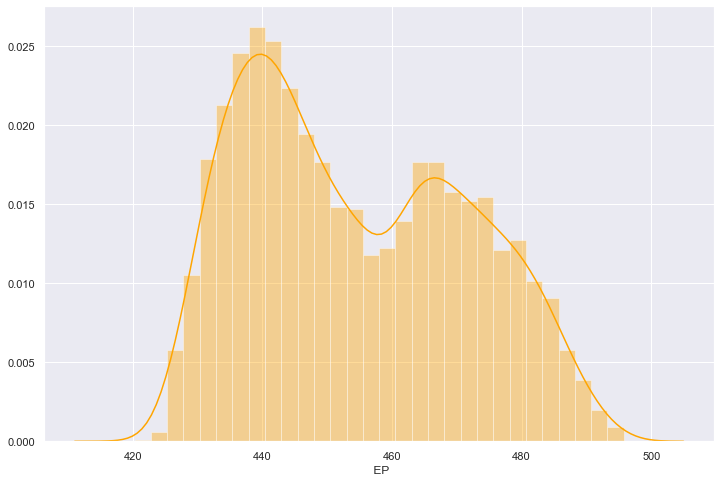

In [14]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(y_train, bins=30, color='orange')
plt.show()

### Correlation

In [15]:
corr_df = data.copy()
corr_df['EP'] = y_train
corr_df.head(10)

,# T,V,AP,RH,EP
0,8.58,38.38,1021.03,84.37,482.26
1,21.79,58.20,1017.21,66.74,446.94
2,16.64,48.92,1011.55,78.76,452.56
3,31.38,71.32,1009.17,60.42,433.44
4,9.20,40.03,1017.05,92.46,480.38
5,26.82,69.23,1013.28,50.86,436.36
6,9.48,40.80,1023.82,78.98,485.36
7,9.41,41.54,1019.48,82.19,481.59
8,31.03,69.59,1007.77,63.96,432.56
9,18.24,59.15,1012.00,84.40,449.48


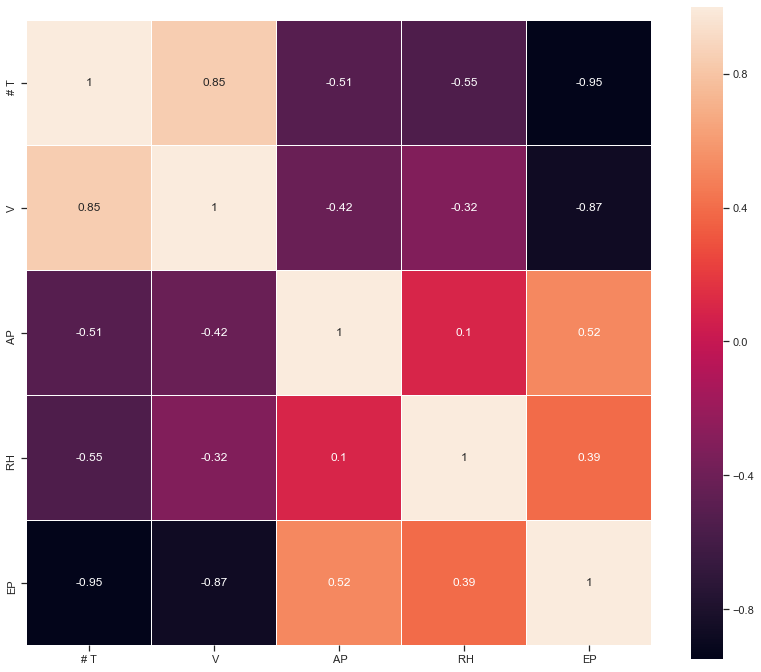

In [16]:
sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(14,12))
sns.heatmap(corr_df.astype('float32').corr(), linewidths=0.1, square=True, annot=True)
plt.show()

### Features Plot

In [17]:
#Print all the features
data.columns

Index(['# T', ' V', ' AP', ' RH'], dtype='object')

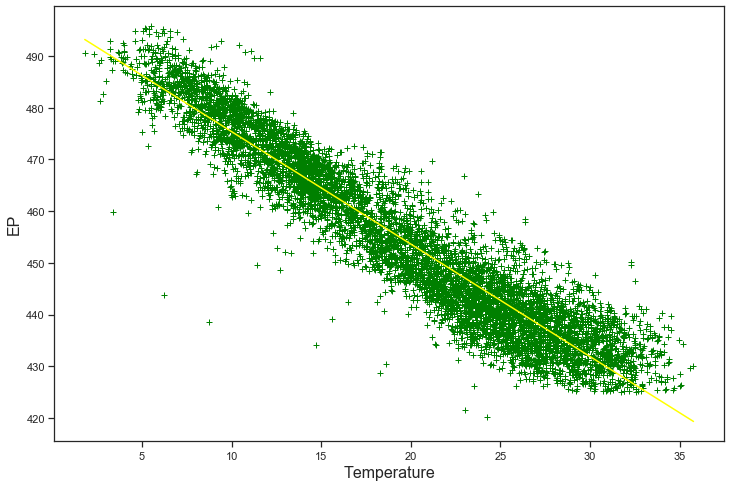

In [18]:
plt.plot(corr_df["# T"],corr_df["EP"], '+', color='green')
plt.plot(np.unique(corr_df['# T']), np.poly1d(np.polyfit(corr_df["# T"], corr_df['EP'], 1))
         (np.unique(corr_df['# T'])), color='yellow')
plt.xlabel("Temperature", fontsize=16)
plt.ylabel("EP", fontsize=16)
plt.show()

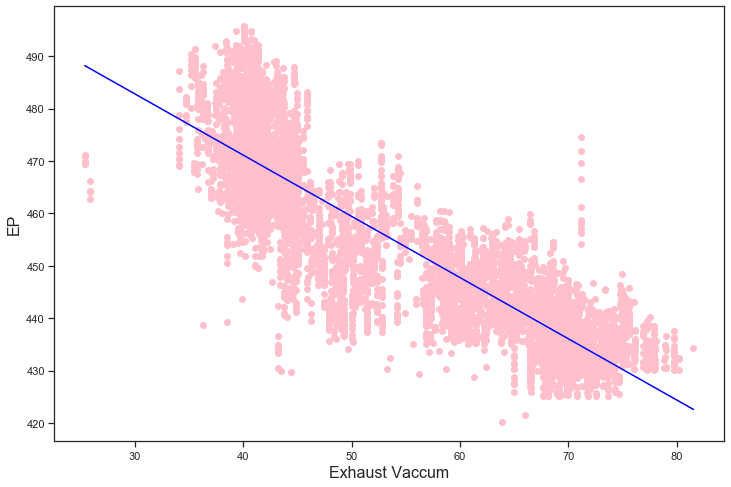

In [19]:
plt.plot(corr_df[" V"],corr_df["EP"], 'o', color='pink')
plt.plot(np.unique(corr_df[' V']), np.poly1d(np.polyfit(corr_df[" V"], corr_df['EP'], 1))
         (np.unique(corr_df[' V'])), color='blue')
plt.xlabel("Exhaust Vaccum", fontsize=16)
plt.ylabel("EP", fontsize=16)
plt.show()

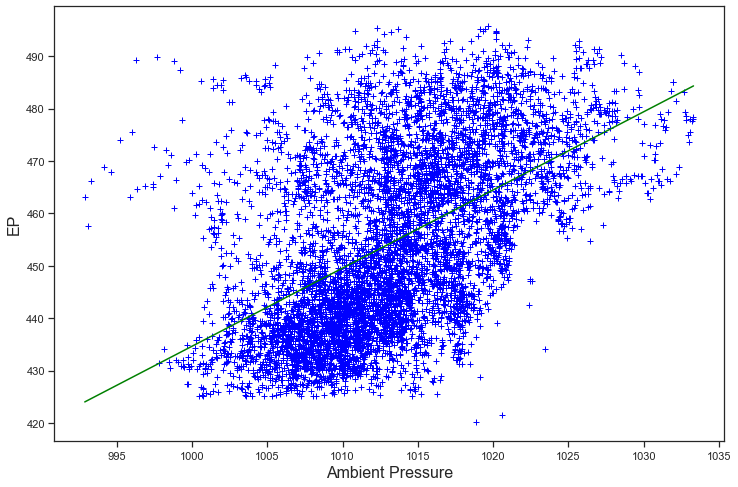

In [20]:
plt.plot(corr_df[" AP"],corr_df["EP"], '+', color='blue')
plt.plot(np.unique(corr_df[' AP']), np.poly1d(np.polyfit(corr_df[" AP"], corr_df['EP'], 1))
         (np.unique(corr_df[' AP'])), color='green')
plt.xlabel("Ambient Pressure", fontsize=16)
plt.ylabel("EP", fontsize=16)
plt.show()

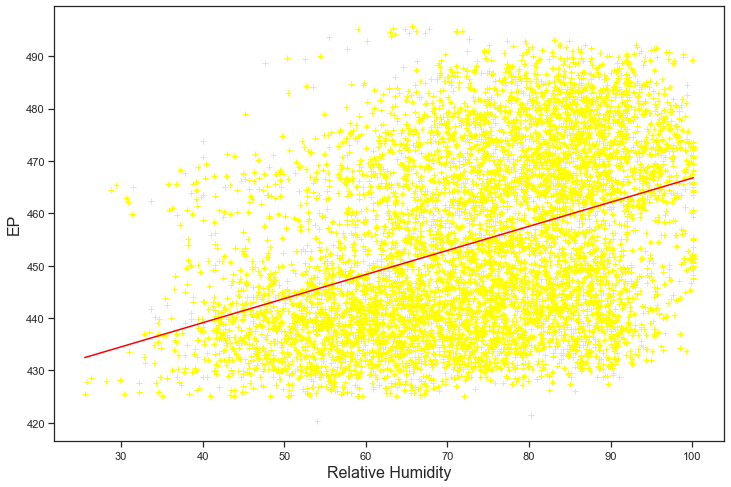

In [21]:
plt.plot(corr_df[" RH"],corr_df["EP"], '+', color='yellow')
plt.plot(np.unique(corr_df[' RH']), np.poly1d(np.polyfit(corr_df[" RH"], corr_df['EP'], 1))
         (np.unique(corr_df[' RH'])), color='red')
plt.xlabel("Relative Humidity", fontsize=16)
plt.ylabel("EP", fontsize=16)
plt.show()

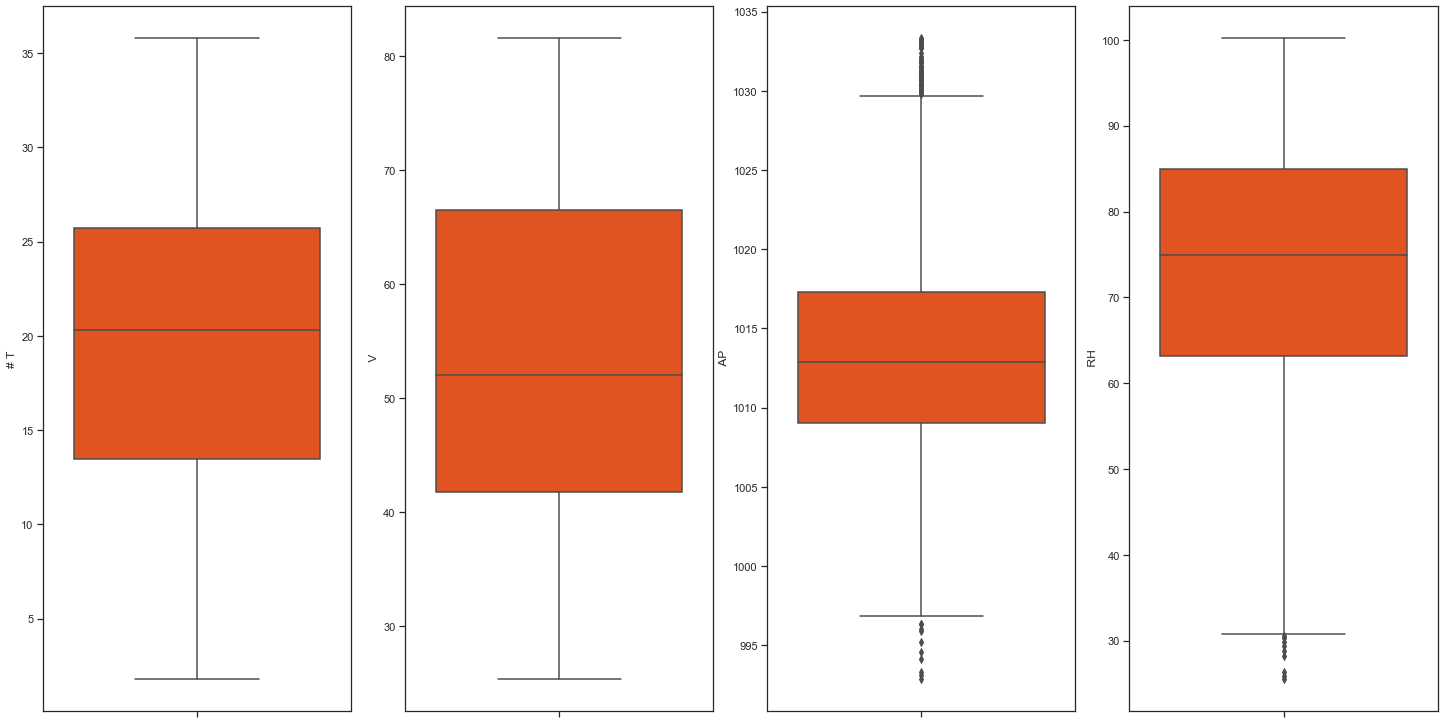

In [22]:
fig, axs =plt.subplots(ncols=4, nrows=1, figsize=(20,10))
index=0
axs = axs.flatten()
for i,v in data.items():
    sns.boxplot(y=i, data=data, ax=axs[index], color='orangered')
    index+=1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5)

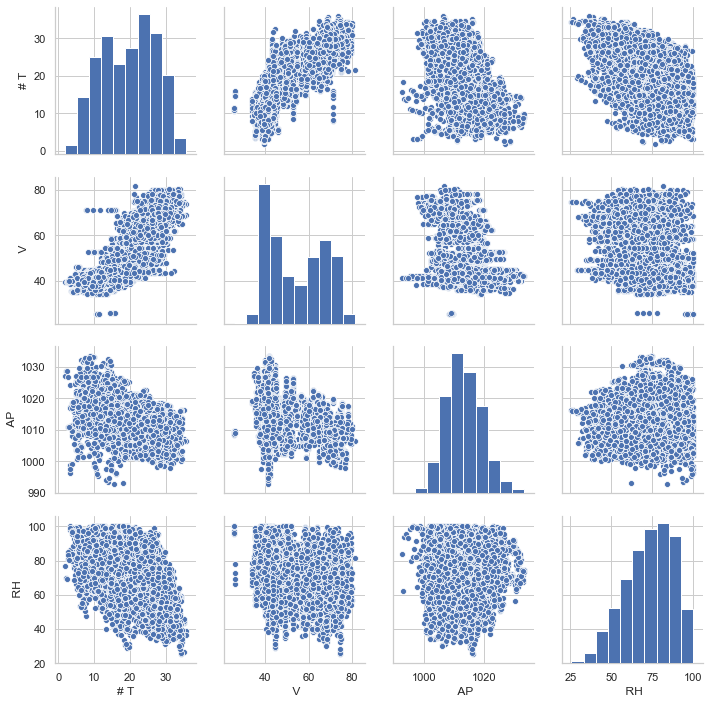

In [23]:
#pairplot
sns.set(style='whitegrid')
features_plot =data.columns

sns.pairplot(data[features_plot]);
plt.tight_layout
plt.show()

### Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.47827466e+00, -1.24764165e+00,  1.30221067e+00,
         7.58624590e-01],
       [ 2.89012041e-01,  3.06797549e-01,  6.61749044e-01,
        -4.46921842e-01],
       [-3.99975582e-01, -4.21012529e-01, -2.87207194e-01,
         3.75010552e-01],
       ...,
       [ 1.36062192e+00,  1.18048335e+00, -6.54382840e-01,
        -5.83682640e-01],
       [-4.36097263e-01,  9.29089763e-04,  7.84140927e-01,
        -6.59584883e-01],
       [ 1.40209496e+00,  6.07960340e-01, -4.31394890e-01,
        -1.73110573e+00]])

### Gradient Descent Model

In [25]:
x_train = data

In [26]:
x_train.shape, y_train.shape

((7176, 4), (7176,))

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(learning_rate=1.9, n_estimators=2000)
gbr

GradientBoostingRegressor(learning_rate=1.9, n_estimators=2000)

In [30]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.9, n_estimators=2000)

In [31]:
y_pred = gbr.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, y_pred))

42.16673040812693


In [33]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

4.79894510421015


In [34]:
# Predict
x_test = np.genfromtxt('test.csv', delimiter=',')
y_train.ravel(order='A')

y_pred = gbr.predict(x_test)

In [35]:
y_pred

array([466.59733463, 471.84822687, 439.80542338, ..., 438.74824361,
       441.77450256, 439.77585118])

### Model Evaluation

In [38]:
gbr.score(X_train, y_train)

0.9996922736481508

### Saving the prediction

In [39]:
np.savetxt('Predict.csv', y_pred, fmt="%.5f")